In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("sms.csv")

In [3]:
dataset

,SMS,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMS     5574 non-null   object
 1   Label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,Label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
#I want to highlight which is spam and ham;
dataset["Class"] = dataset["Label"].map({0: "Ham",
                                          1: "Spam"})

In [7]:
dataset

,SMS,Label,Class
0,"Go until jurong point, crazy.. Available only ...",0,Ham
1,Ok lar... Joking wif u oni...\n,0,Ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Spam
3,U dun say so early hor... U c already then say...,0,Ham
4,"Nah I don't think he goes to usf, he lives aro...",0,Ham
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,Spam
5570,Will ü b going to esplanade fr home?\n,0,Ham
5571,"Pity, * was in mood for that. So...any other s...",0,Ham
5572,The guy did some bitching but I acted like i'd...,0,Ham


**Now the dataset looks perfect!**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

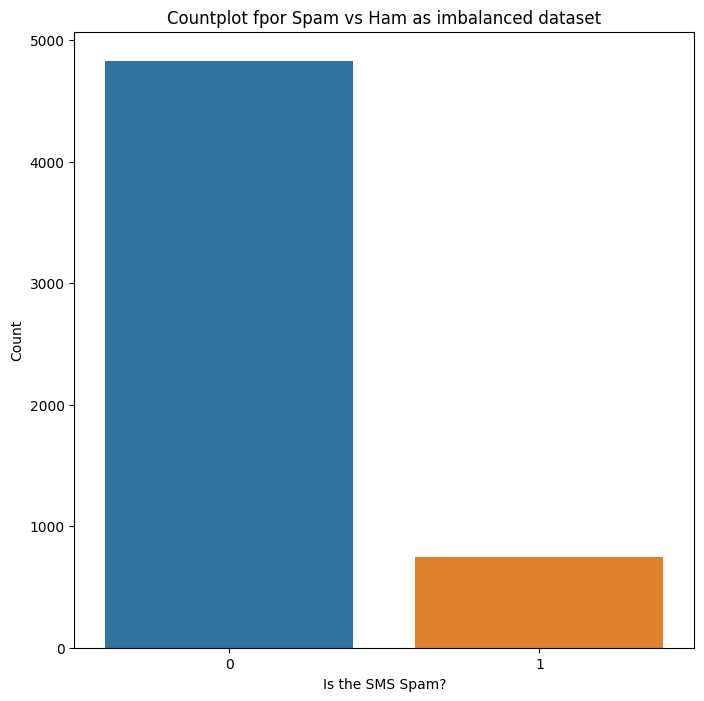

In [9]:
#countplot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="Label", data=dataset)
p = plt.title('Countplot fpor Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [10]:
#handling imbalanced dataset using Oversampling
only_spam =dataset[dataset["Label"] == 1]
only_spam

,SMS,Label,Class
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Spam
5,FreeMsg Hey there darling it's been 3 week's n...,1,Spam
8,WINNER!! As a valued network customer you have...,1,Spam
9,Had your mobile 11 months or more? U R entitle...,1,Spam
11,"SIX chances to win CASH! From 100 to 20,000 po...",1,Spam
...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,Spam
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,Spam
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,Spam
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,Spam


In [11]:
print('No of Spam SMS:', len(only_spam))
print('No of Ham SMS:', len(dataset) - len(only_spam))
print("Total SMS:", len(dataset))

No of Spam SMS: 747
No of Ham SMS: 4827
Total SMS: 5574


In [12]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

6

In [13]:
for i in range(0,count-1):
    dataset = pd.concat([dataset, only_spam])

dataset.shape

(9309, 3)

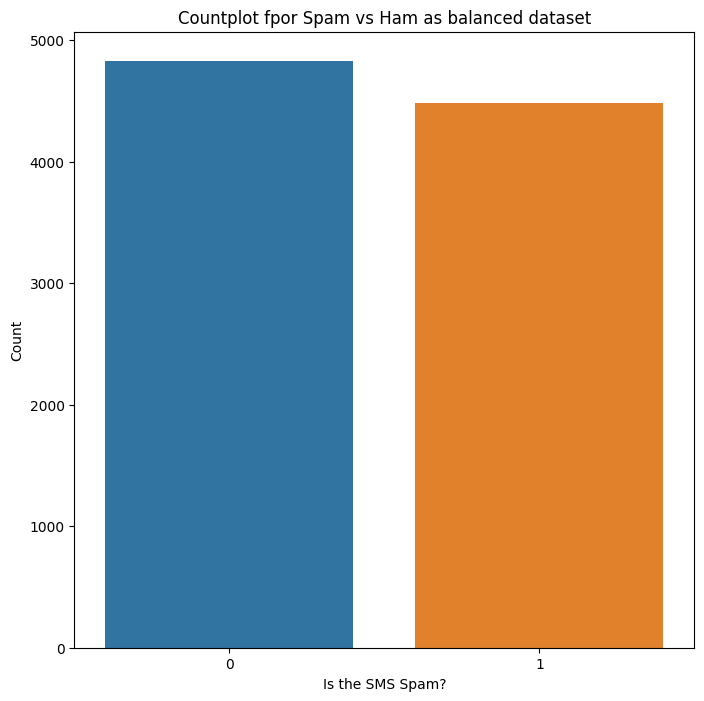

In [14]:
#countplot for spam vs ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="Label", data=dataset)
p = plt.title('Countplot fpor Spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [15]:
#creating new feature word_count
dataset['word_count'] = dataset['SMS'].apply(lambda x: len(x.split()))

In [16]:
dataset

,SMS,Label,Class,word_count
0,"Go until jurong point, crazy.. Available only ...",0,Ham,20
1,Ok lar... Joking wif u oni...\n,0,Ham,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Spam,28
3,U dun say so early hor... U c already then say...,0,Ham,11
4,"Nah I don't think he goes to usf, he lives aro...",0,Ham,13
...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,Spam,16
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,Spam,33
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,Spam,28
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,Spam,28


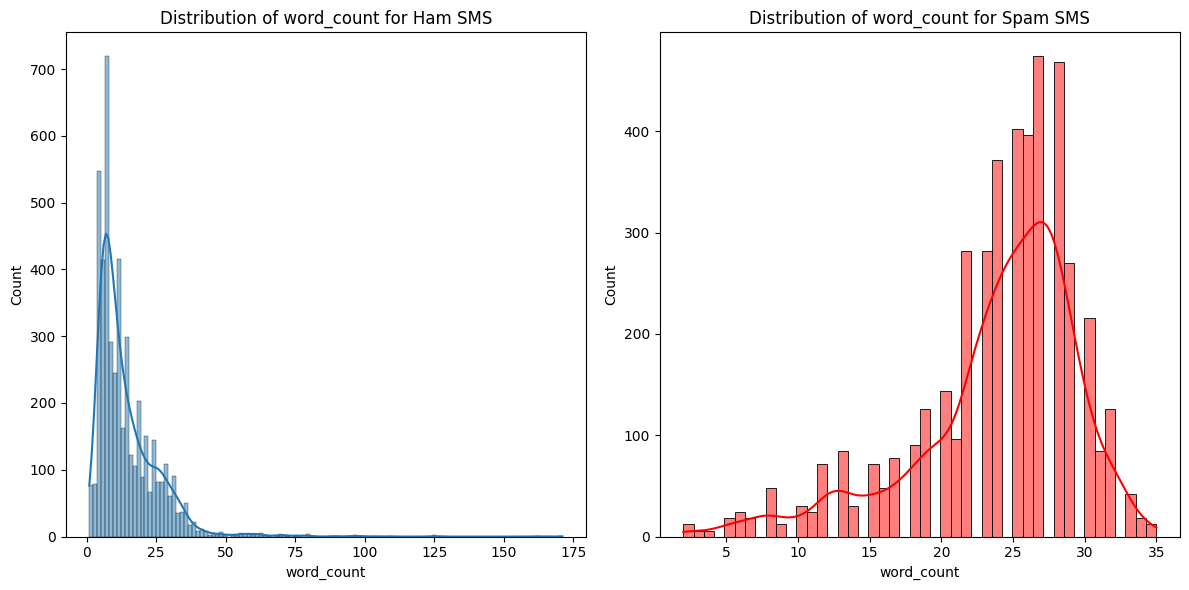

In [17]:
plt.figure(figsize=(12,6))
#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["Label"] == 0].word_count, kde = True)
p = plt.title("Distribution of word_count for Ham SMS")

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["Label"] == 1].word_count, color="red", kde = True)
p = plt.title("Distribution of word_count for Spam SMS")

plt.tight_layout()
plt.show()

In [18]:
#creating new feature of currency_symbols
def Currency(data):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [19]:
dataset["contains_currency_symbols"] = dataset["SMS"].apply(Currency)

In [20]:
dataset

,SMS,Label,Class,word_count,contains_currency_symbols
0,"Go until jurong point, crazy.. Available only ...",0,Ham,20,0
1,Ok lar... Joking wif u oni...\n,0,Ham,6,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Spam,28,0
3,U dun say so early hor... U c already then say...,0,Ham,11,0
4,"Nah I don't think he goes to usf, he lives aro...",0,Ham,13,0
...,...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,Spam,16,0
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,Spam,33,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,Spam,28,0
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,Spam,28,0


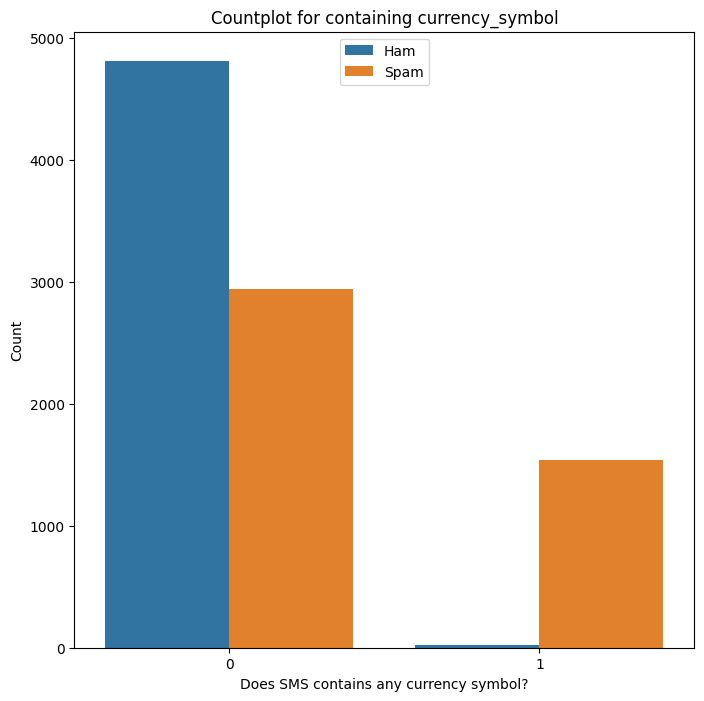

In [21]:
#countplot for currency_symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x="contains_currency_symbols", data=dataset, hue = "Label")
p = plt.title('Countplot for containing currency_symbol')
p = plt.xlabel('Does SMS contains any currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham','Spam'], loc = 9) 

In [22]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [23]:
dataset["Contains_number"] = dataset["SMS"].apply(number)

In [24]:
dataset

,SMS,Label,Class,word_count,contains_currency_symbols,Contains_number
0,"Go until jurong point, crazy.. Available only ...",0,Ham,20,0,0
1,Ok lar... Joking wif u oni...\n,0,Ham,6,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Spam,28,0,1
3,U dun say so early hor... U c already then say...,0,Ham,11,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,Ham,13,0,0
...,...,...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,Spam,16,0,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,Spam,33,1,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,Spam,28,0,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,Spam,28,0,1


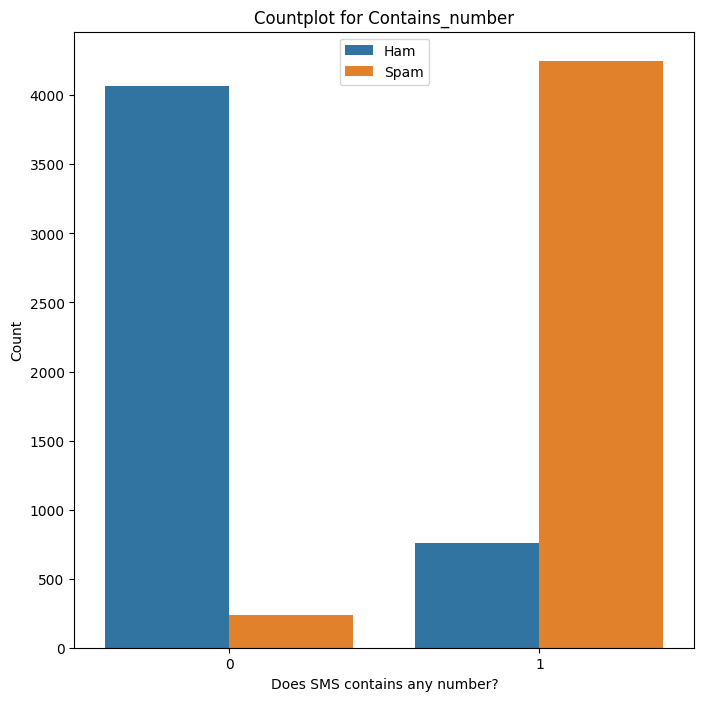

In [25]:
#countplot for containg_number
plt.figure(figsize=(8,8))
g = sns.countplot(x="Contains_number", data=dataset, hue = "Label")
p = plt.title('Countplot for Contains_number')
p = plt.xlabel('Does SMS contains any number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham','Spam'], loc = 9) 

In [26]:
#Data Cleaning
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.SMS):
    message = re.sub(pattern = '[^a-zA-Z]', repl =' ', string = sms) #filtering out special characters and numbers
    message = message.lower()
    words = message.split() #Tokenizer 
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    
    corpus.append(message)

In [28]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [29]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [30]:
X = pd.DataFrame(vectors, columns = feature_names)
Y = dataset["Label"]

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [33]:
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
5970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
3509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.296944,0.0,0.0,0.0,0.00000,0.0,0.0
4401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
3095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
6098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
4271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399268,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
2404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0


In [34]:
#Naive Bays Model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, Y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [35]:
mnb.fit(X_train, Y_train)
Y_pred = mnb.predict(X_test)

In [36]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       954
           1       0.94      0.93      0.94       908

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [37]:
#confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[900,  54],
       [ 62, 846]], dtype=int64)

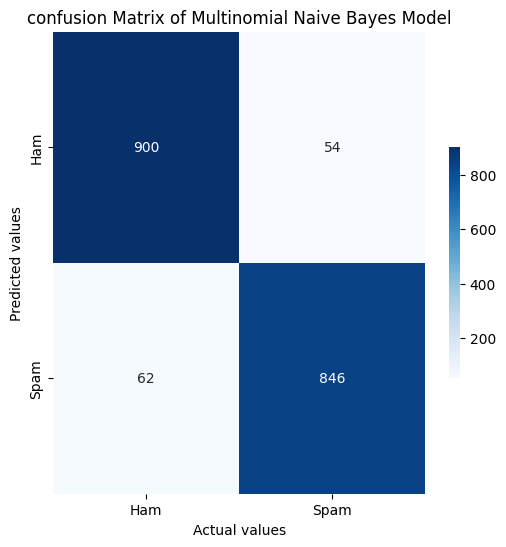

In [38]:
plt.figure(figsize=(6,6))
axis_labels = ['Ham','Spam']
g = sns.heatmap(data=cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g', cbar_kws = {'shrink': 0.5}, cmap="Blues")
p = plt.title("confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel("Predicted values")

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(mnb, X, Y, scoring='f1', cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.943
0.004


In [40]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
Y_pred1 = dt.predict(X_test)

In [42]:
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       954
           1       0.97      0.99      0.98       908

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [43]:
#confusion matrix
cm1 = confusion_matrix(Y_test, Y_pred1)
cm1

array([[924,  30],
       [  5, 903]], dtype=int64)

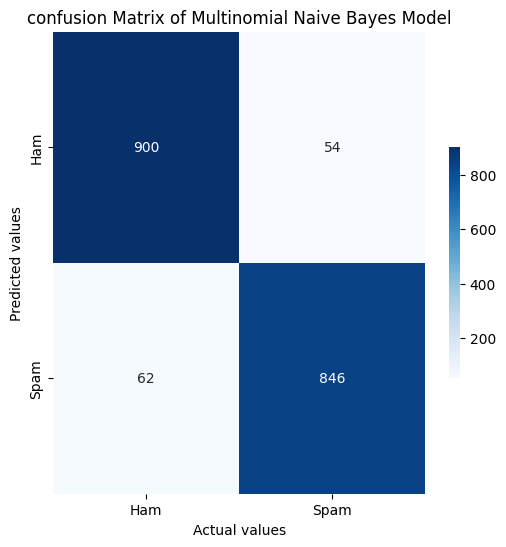

In [44]:
plt.figure(figsize=(6,6))
axis_labels = ['Ham','Spam']
g = sns.heatmap(data=cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g', cbar_kws = {'shrink': 0.5}, cmap="Blues")
p = plt.title("confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel("Predicted values")

**let's just check an example:**

In [45]:
def predict_spam(sms):
  message = re.sub(pattern = '[^a-zA-Z]', repl =' ', string=sms)
  message = message.lower()
  words = message.split()
  filtered_words = [word for word in words if word not in stopwords.words('english')[:10]]
  lemm_words = [wnl.lemmatize(word) for word in filtered_words]
  message = ' '.join(lemm_words)
  temp = tfidf.transform([message]).toarray()
  return dt.predict(temp)

In [46]:
sample_sms = "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"
if predict_spam(sample_sms):
    print('This is a SPAM SMS')
else:
    print('This is a HAM SMS')

This is a SPAM SMS


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Let's take another one**

In [47]:
sample_sms = "I HAVE A DATE ON SUNDAY WITH WILL!!"
if predict_spam(sample_sms):
    print('This is a SPAM SMS')
else:
    print('This is a HAM SMS')

This is a HAM SMS


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Let's see what exactly our accuracy score**

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9377013963480129

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred1)

0.981203007518797

<h3> Conclusion: As we can see this prediction gives us 98.60% accuracy which is really good. We can easily predict whether it's spam or ham messages.</h3>

<h2 style="text-align: center;">!!! Happy  Coding !!!</h2>